# Simple linear regression model: Testing 2 Random Variables 
cov and var only measure association between two random variables. use models to measure corr between one variable and  multiple random variable

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#import dataset
#see association between 2 random variables to determine which dtaset to use
housing= pd.DataFrame.from_csv('../data/housing.csv')
housing.head()
housing.cov()
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


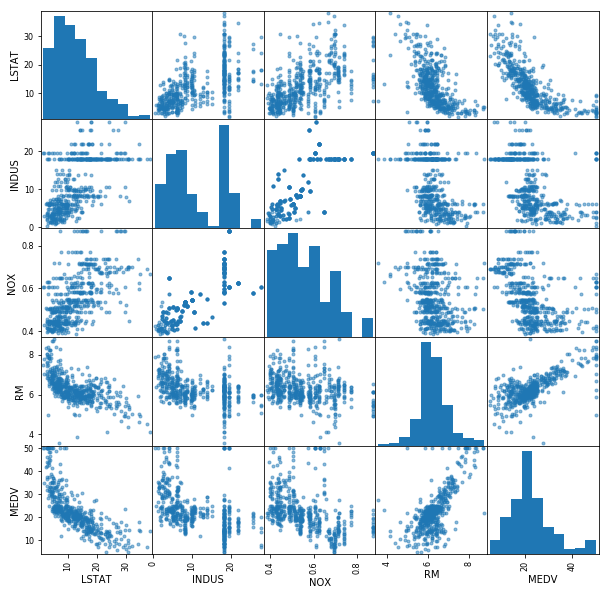

In [3]:
# cov and var only look at linear relationhip
# use scatter matrix plot to look for linear and nonlinear correlations_
from pandas.tools.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(10, 10))

# Simple linear regression

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

models= use predictors to estimate response variable.

Example High Frequency Trading Model uses predictors: (price,volume,momentum,etc  history of last ten minutes) to estimate response: (price change in 5 minutes).

### We shall base on the association between LSTAT and MEDV (becuse they have strong linear association(corr) and create a simple linear regression model. Let's use python in estimating the values of B0 and B1 (intercept and slope)

#use samples to estimate 
#beta0 (intercept),beta1 (slope), and sigma(std dev)

170373.528047


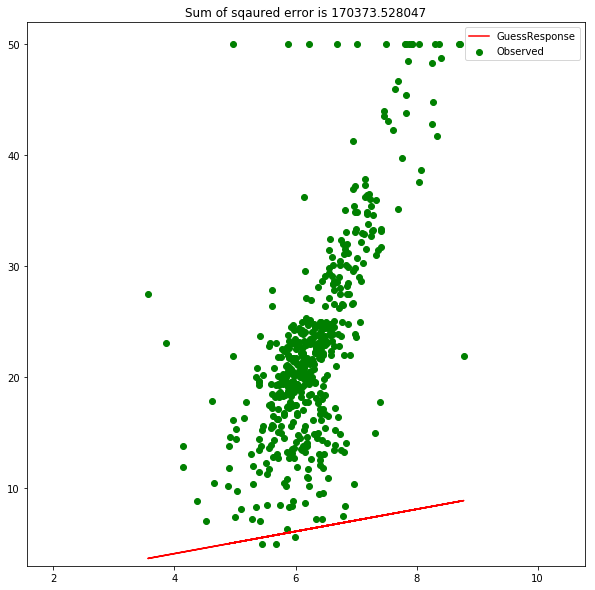

In [4]:
# since we dont know the ocation of our line just the formula we have to guess using our sample data llets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = .1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['RM']

# Also want to know the error of of guess...
# Oberved error sshow how far is our guess responses  are from the true response
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']
print((housing['observederror']**2).sum())
# sum of each observation,squared is called sum_of_squared_error

# plot your estimated line together with the observed error points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

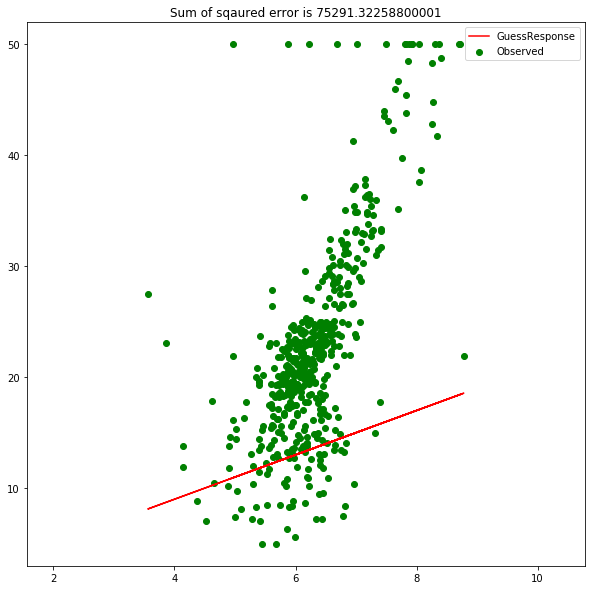

In [5]:
# squared error too large ttry again
b0 = 1
b1 = 2
housing['GuessResponse'] = b0 + b1*housing['RM']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()#

# Least sqaure estimates
#to find best fit parameters of Bo and B1

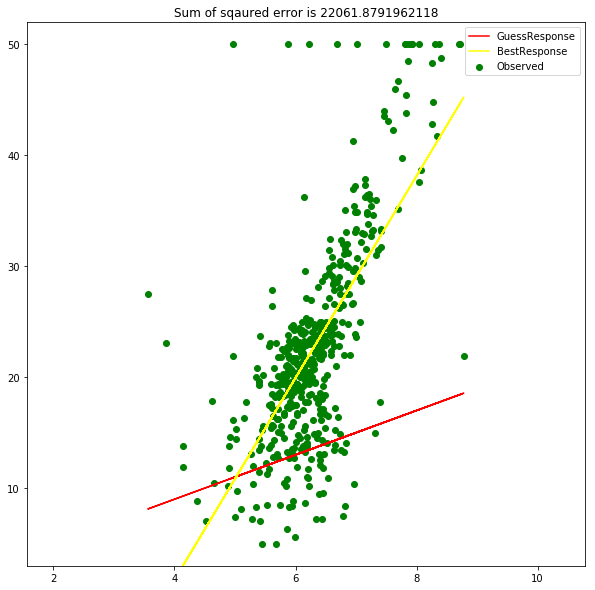

In [6]:
# Import the ols'ordinary least squares' formula 
import statsmodels.formula.api as smf
formula = 'MEDV~RM'
model = smf.ols(formula=formula, data=housing).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]
#compute  predicted value using prediction equation
housing['BestResponse'] = b0_ols + b1_ols*housing['RM']

# Also want to know the error of of guess...
housing['error'] = housing['MEDV'] - housing['BestResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((housing['error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()
#yellow line = best fit line

# Summary table
1. p_value of RM= probability of statistic to take a more extreme value on a two tailed test (with degree of freedom n-1 for sample and n for population) *if pvalue=0 <alpha then we reject the null hypothesis Ho= 0 H1not=0
*in this case .025 each tail alpha=.5 because we have n-1 DOFreedom, and p value = 0 sowe reject the null w/ 5% chance our model is wrong
2. check confidence interval (note confidence level default is always 95%) here we have 95% chance mean of H1 falls between 8.3_H1_9.275 *this fits our scatterplot image because it is positive #
3. Check R squared number. This tells us what percentage of variation is explained by the model. .48 or 48% means there is only a 48% chance variation in MEDV can be explained by our model (under 50% not good unless very noisy data) This means the other 50% of our data can be explained using other variables (in this case we might try multiple linear regression model and include more parameters in our model)

In [7]:
#Refer to the P-value of RM , Confidence Interval and R-square to evaluate the performance.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           2.49e-74
Time:                        21:00:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumptions behind linear regression model¶ 
1 Linearity
2 independence
3 Normality
4 Equal Variance
Test Each for Errors, If any assumption is violated cant use to make statistical inference (like Confidence Int.) but can still use to make predictions!

# Linearity¶ view scatterplot

In [ ]:
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10), color='g')

# Independence¶ no serial correlation between errors

In [ ]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

In [ ]:
# Method 1: Residual vs order plot
# visually chck error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()
#dont want any error correlation 

In [ ]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 
#1.5 to 2.5 are relatively normal 
#below 1.5= possibly positively dist +2.5 negative distr
#meaning assumption of independence may be violated
model.summary()
#.68=normal

# Normality 

In [ ]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)
#probplot=normal stdard error
#compares your error distribution to normal distribution 
stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()
#should be about 45degree line, similar here

# Equal Variance : variance of noise 

In [ ]:
# Residual plot vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()
#shouldnt have any pattern

## We can see that the regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model. However we don't need to satisfy to make predictions, the assumptions have no corrrelation with accuracy / usefulness of our model